In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [82]:
df=pd.read_csv("loan dataset.csv")

In [83]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [85]:
df.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

In [86]:
df=df.drop("Loan_ID",axis=1)

# 1.EDA

In [87]:
categorical_attributes=["Gender", "Married", "Dependents", "Education", "Self_Employed", "Credit_History", "Property_Area", "Loan_Status"]

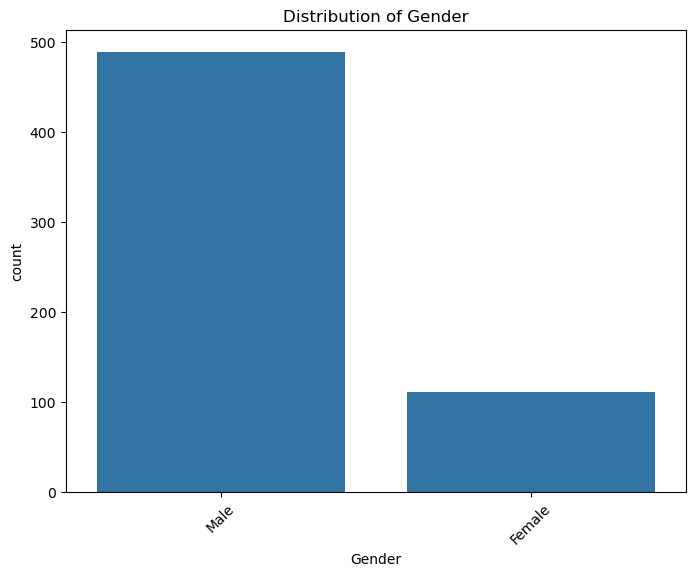

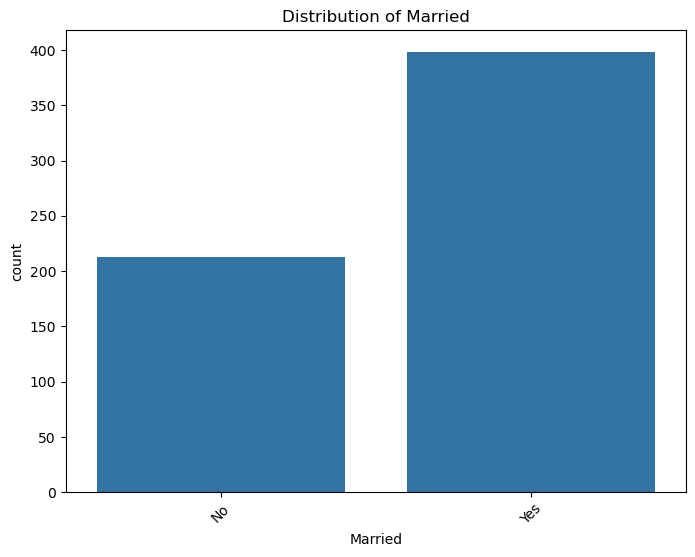

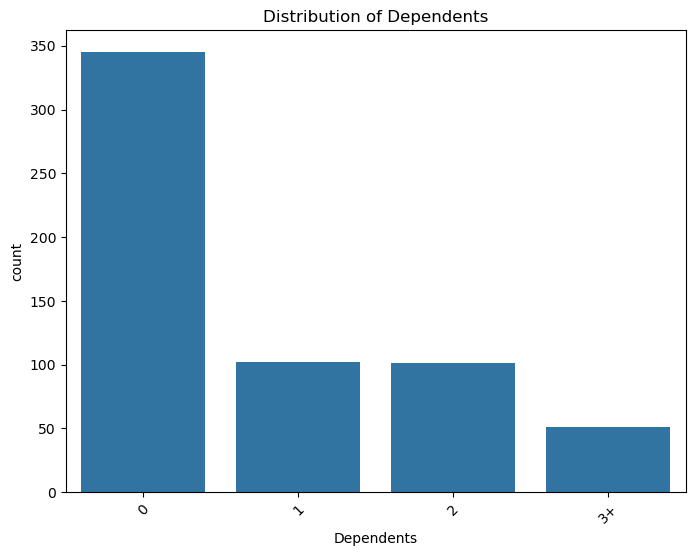

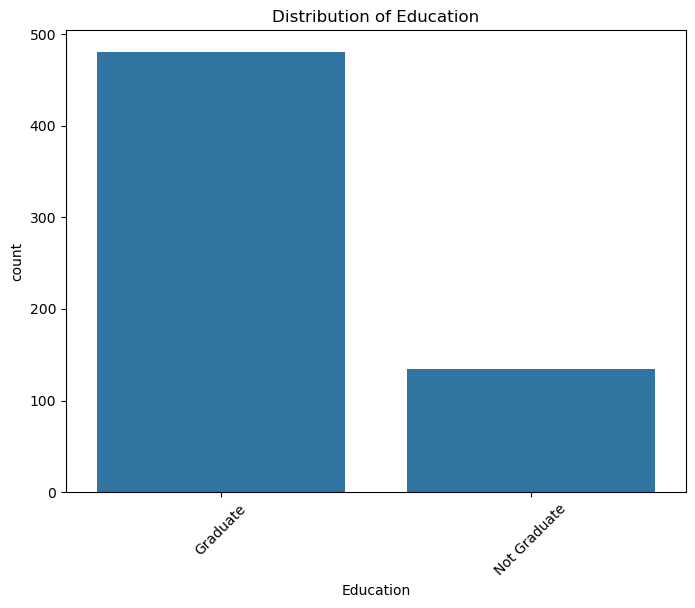

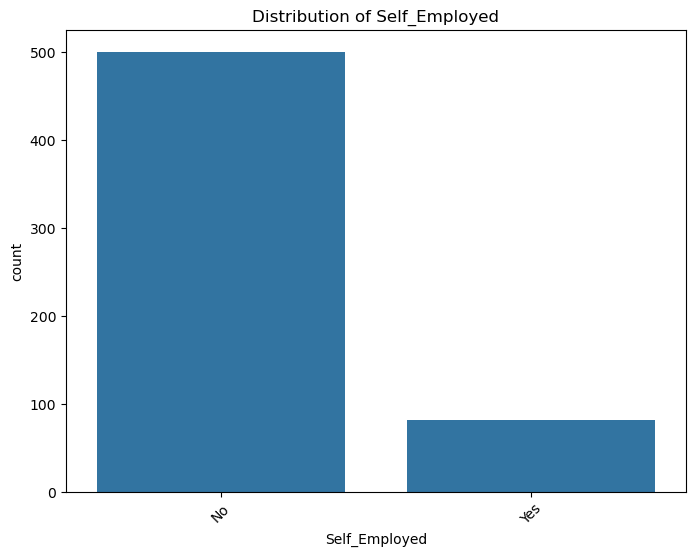

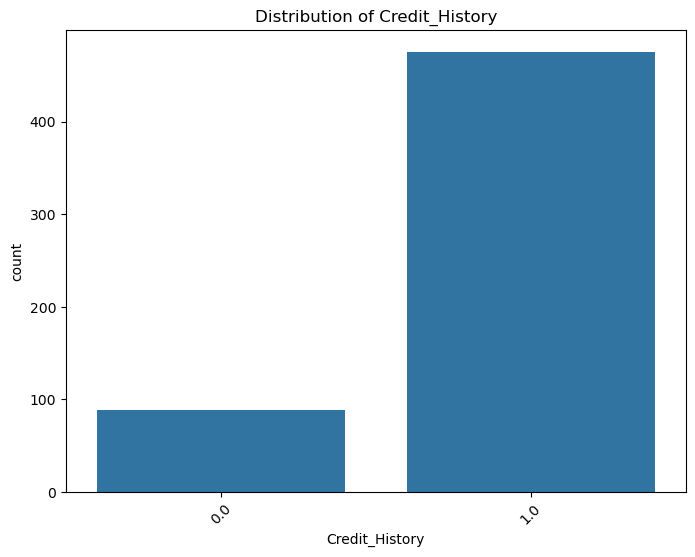

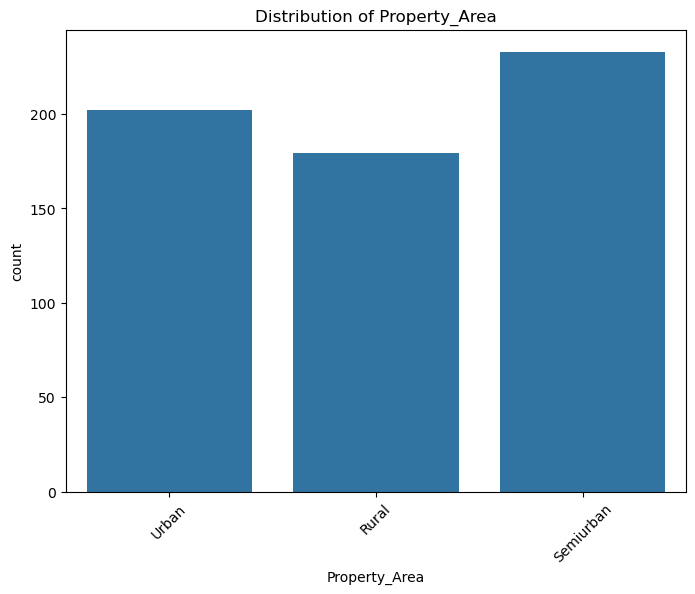

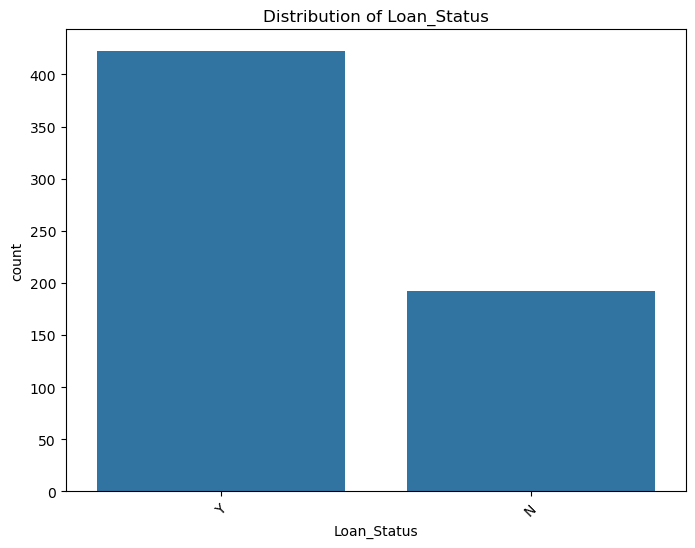

In [88]:
for attribute in categorical_attributes:
    plt.figure(figsize=(8,6))
    sns.countplot(data=df, x=attribute)
    plt.title(f"Distribution of {attribute}")
    plt.xlabel(attribute)
    plt.ylabel("count")
    plt.xticks(rotation=45)
    plt.show()

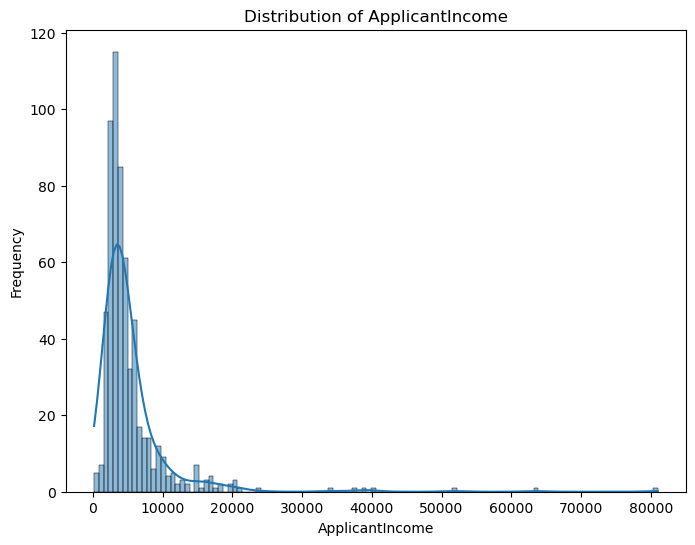

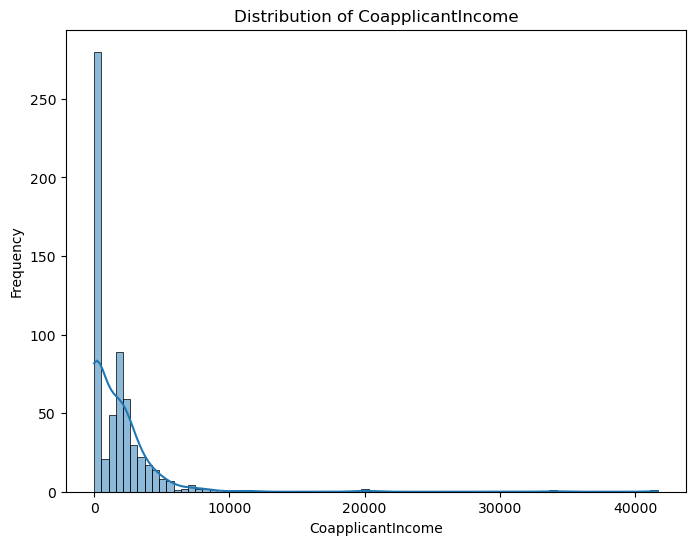

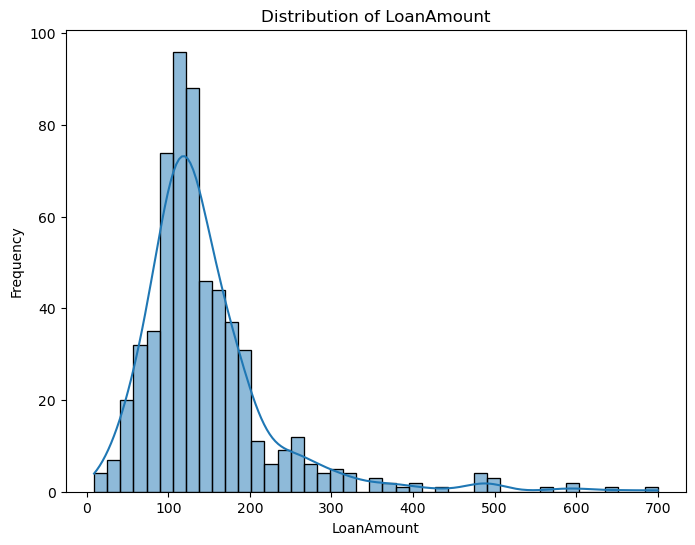

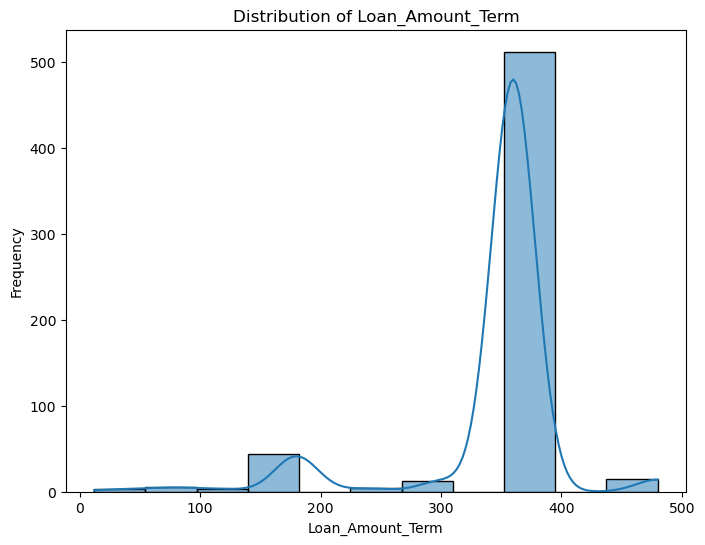

In [89]:
continuous_attributes = ["ApplicantIncome", "CoapplicantIncome", "LoanAmount", "Loan_Amount_Term"]
for attribute in continuous_attributes:
    plt.figure(figsize=(8,6))
    sns.histplot(data=df, x=attribute, kde=True)
    plt.title(f"Distribution of {attribute}")
    plt.xlabel(attribute)
    plt.ylabel("Frequency")
    plt.show()

In [90]:
# sns.histplot(data=df, x=np.log(df["ApplicantIncome"]), kde=True)
# sns.histplot(data=df, x=np.log(df["CoapplicantIncome"]), kde=True)
# sns.histplot(data=df, x=np.log(df["LoanAmount"]), kde=True)

<Figure size 800x600 with 0 Axes>

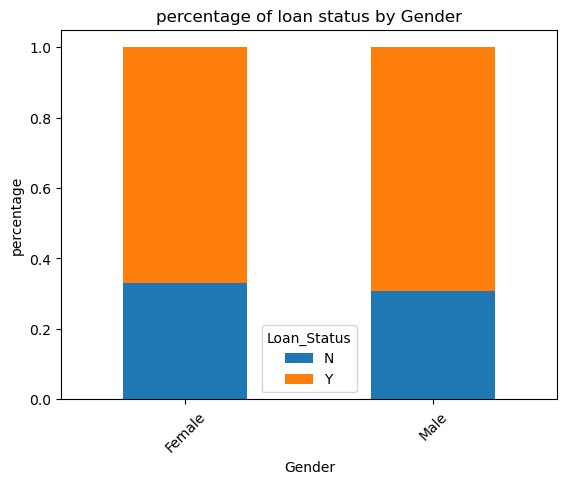

<Figure size 800x600 with 0 Axes>

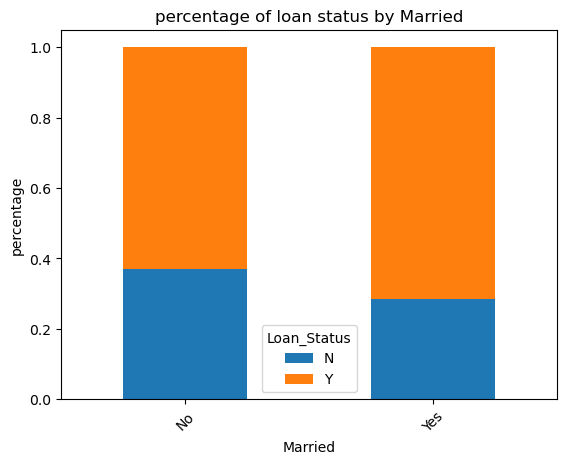

<Figure size 800x600 with 0 Axes>

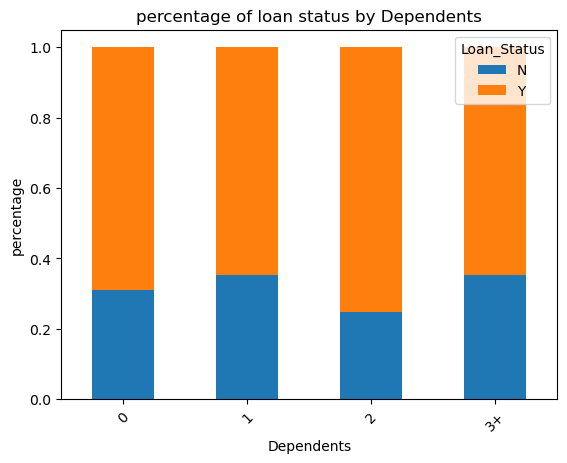

<Figure size 800x600 with 0 Axes>

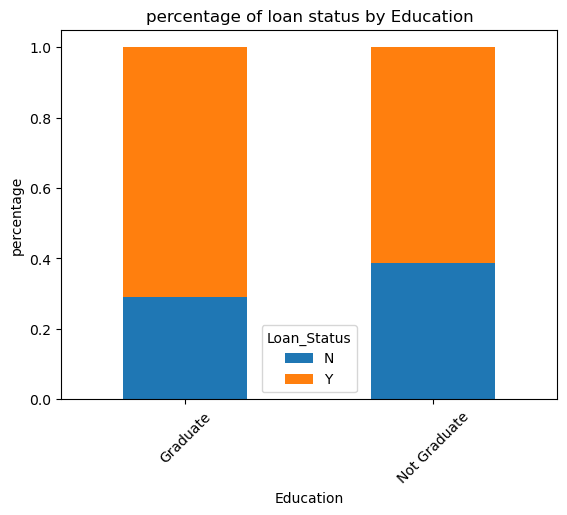

<Figure size 800x600 with 0 Axes>

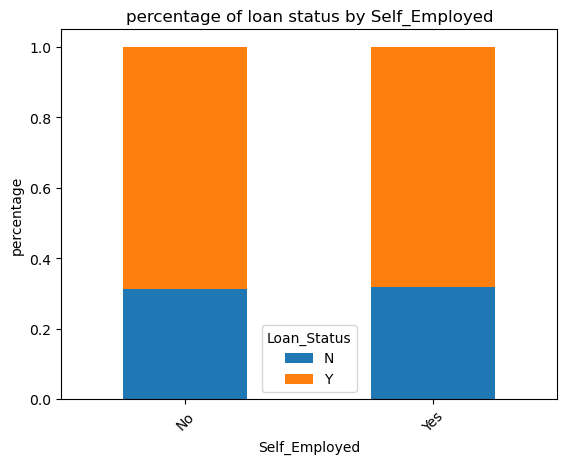

<Figure size 800x600 with 0 Axes>

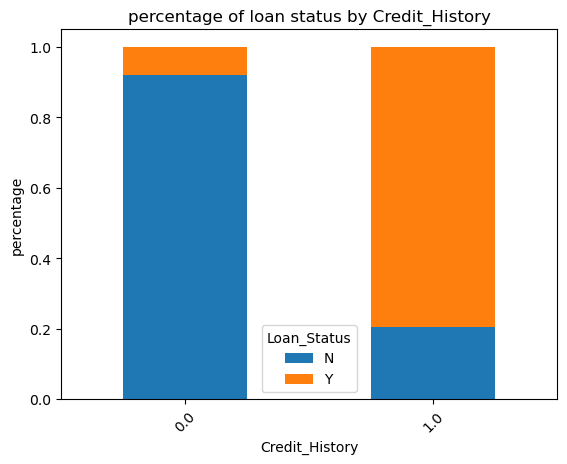

<Figure size 800x600 with 0 Axes>

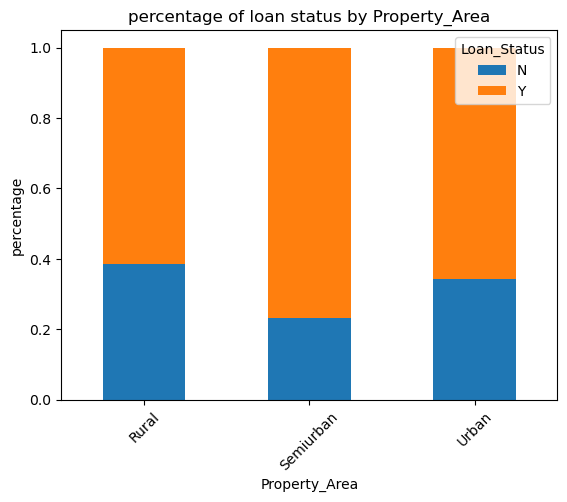

<Figure size 800x600 with 0 Axes>

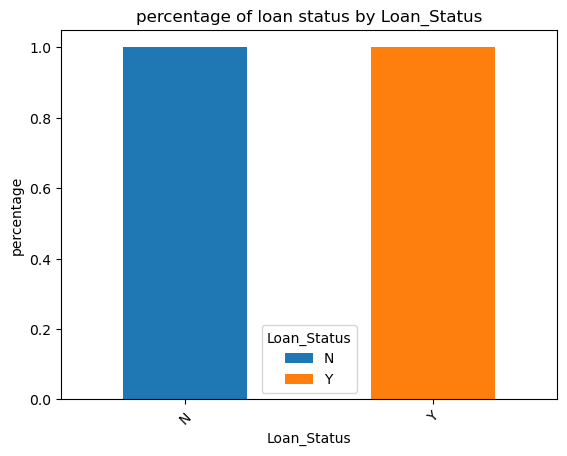

In [91]:
for attribute in categorical_attributes:
    plt.figure(figsize=(8,6))
    cross_tab = pd.crosstab(df[attribute], df['Loan_Status'], normalize='index')
    cross_tab.plot(kind='bar', stacked=True)
    plt.title(f"percentage of loan status by {attribute}")
    plt.xlabel(attribute)
    plt.ylabel("percentage")
    plt.xticks(rotation=45)
    plt.show()

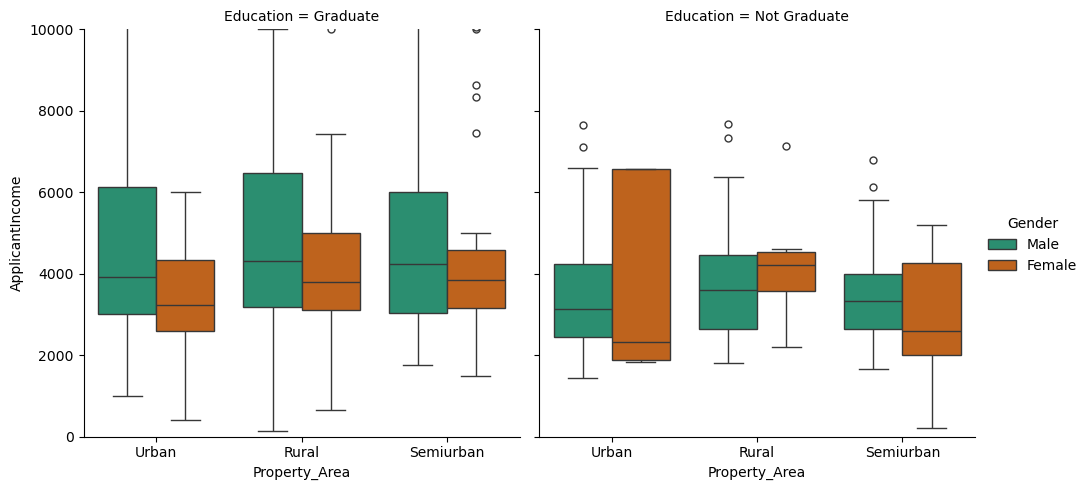

In [92]:
sns.catplot(x='Property_Area',y='ApplicantIncome',data=df,kind='box',col='Education',hue='Gender',palette='Dark2')
plt.ylim(0,10000)
plt.show()

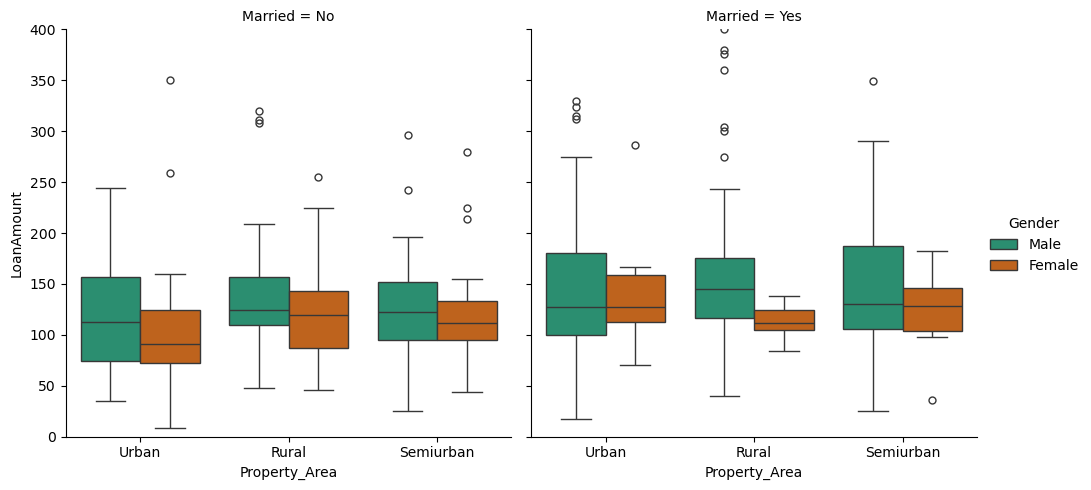

In [93]:
sns.catplot(x='Property_Area',y='LoanAmount',data=df,kind='box',col='Married',hue='Gender',palette='Dark2')
plt.ylim(0,400)
plt.show()

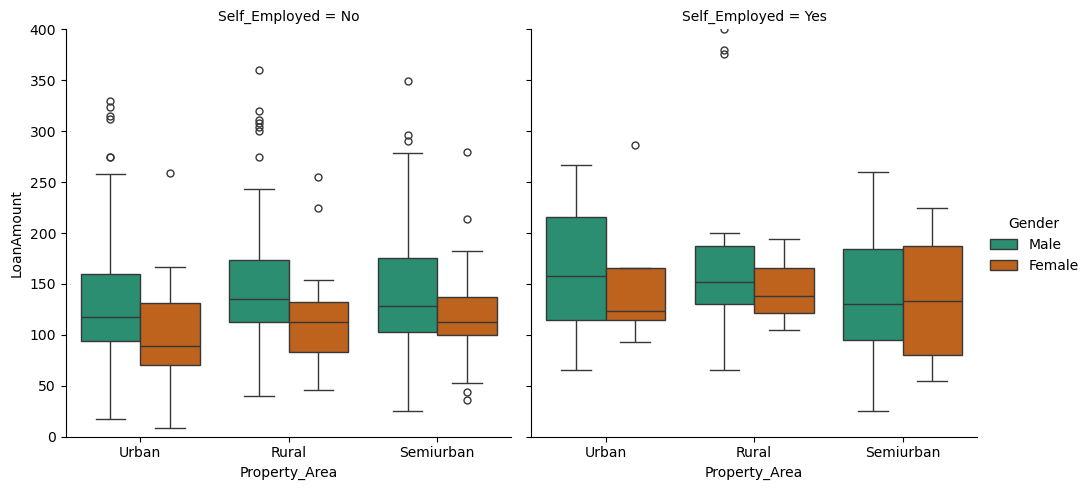

In [94]:
sns.catplot(x='Property_Area',y='LoanAmount',data=df,kind='box',col='Self_Employed',hue='Gender',palette='Dark2')
plt.ylim(0,400)
plt.show()

<Axes: xlabel='ApplicantIncome', ylabel='LoanAmount'>

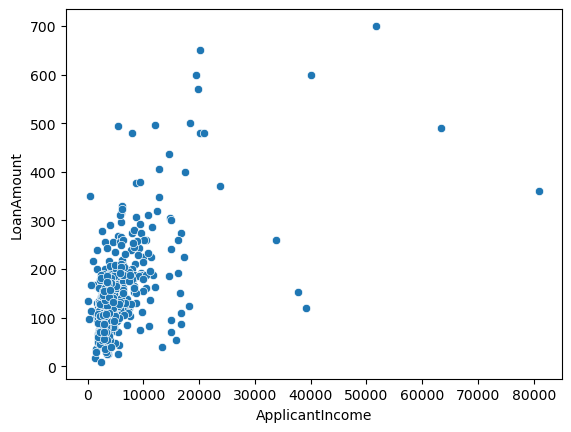

In [95]:
sns.scatterplot(data=df, x='ApplicantIncome', y='LoanAmount')

<Axes: xlabel='Loan_Amount_Term', ylabel='LoanAmount'>

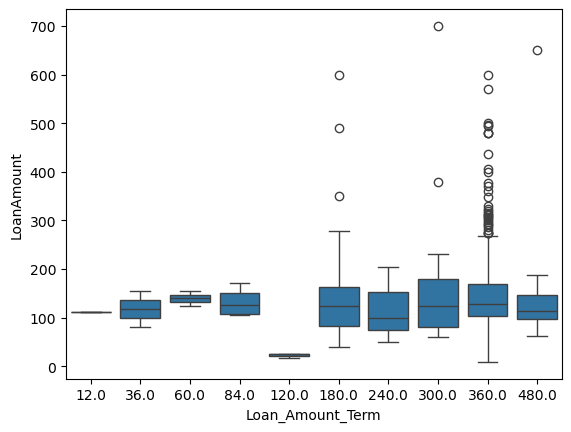

In [96]:
sns.boxplot(data=df, x="Loan_Amount_Term", y='LoanAmount')

<Axes: xlabel='Loan_Status', ylabel='LoanAmount'>

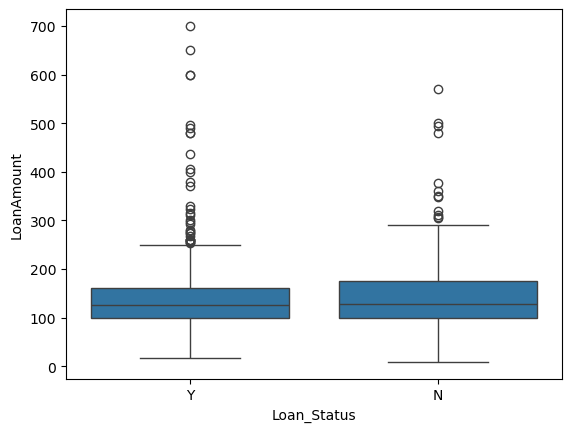

In [97]:
sns.boxplot(data=df,x="Loan_Status",y="LoanAmount")

<Axes: xlabel='Property_Area', ylabel='LoanAmount'>

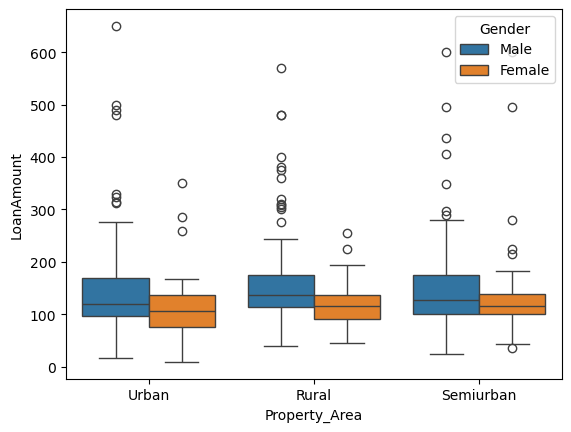

In [98]:
sns.boxplot(data=df, x="Property_Area", y='LoanAmount',hue="Gender")

<Axes: xlabel='Property_Area', ylabel='LoanAmount'>

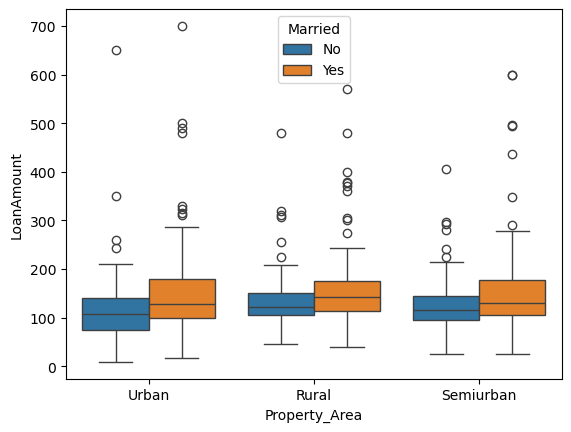

In [99]:
sns.boxplot(data=df, x="Property_Area", y='LoanAmount',hue="Married")

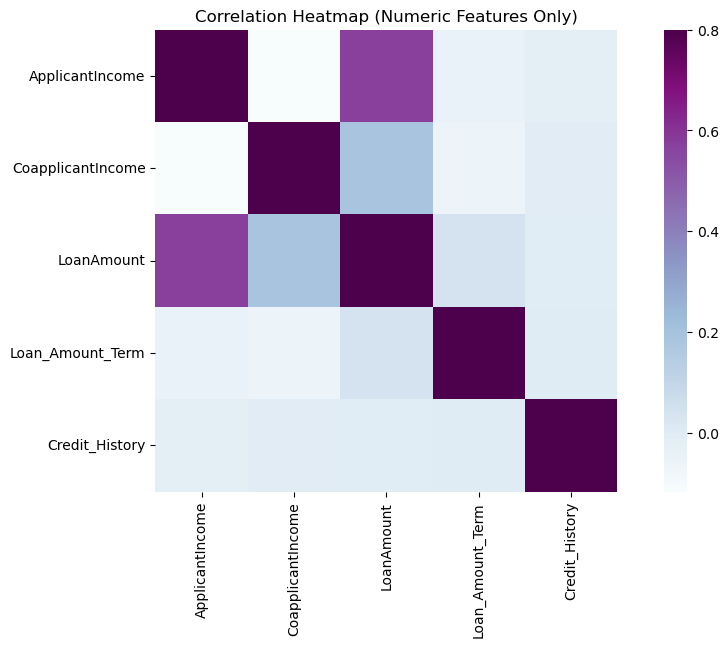

In [100]:
plt.figure(figsize=(12,6))
sns.heatmap(df.select_dtypes(include=[np.number]).corr(), 
            vmax=0.8, square=True, cmap='BuPu')
plt.title("Correlation Heatmap (Numeric Features Only)")
plt.show()


# 2.Use machine learning to predict loan status

## 2.1 data cleaning

#### for categorical variables, use mode; for numercial variable, use KNN imputation

In [101]:
# df=df.drop(['Total_Income', 'Total_Income_bin'], axis=1)

In [102]:
df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [103]:
columns=["Gender","Married","Dependents","Self_Employed"]
for column in columns:
    df[column].fillna(df[column].mode()[0],inplace=True)

C:\Users\keden\AppData\Local\Temp\ipykernel_22428\2401994017.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].mode()[0],inplace=True)


In [104]:
# df.isnull().sum()

In [105]:
from sklearn.impute import KNNImputer

In [106]:
imputer=KNNImputer(n_neighbors=5)
df['LoanAmount']=imputer.fit_transform(df[['LoanAmount']])
df['Loan_Amount_Term'] = imputer.fit_transform(df[['Loan_Amount_Term']])
df['Credit_History'] = imputer.fit_transform(df[['Credit_History']])

In [107]:
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [108]:
df["Dependents"].unique()

array(['0', '1', '2', '3+'], dtype=object)

In [109]:
df["Dependents"].replace("3+",3,inplace=True)

C:\Users\keden\AppData\Local\Temp\ipykernel_22428\3858213490.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Dependents"].replace("3+",3,inplace=True)


In [110]:
df["Dependents"].unique()

array(['0', '1', '2', 3], dtype=object)

In [111]:
# df.head()

In [112]:
df['Gender'] = df['Gender'].map({'Male':1,'Female':0}).astype('int')
df['Married'] = df['Married'].map({'Yes':1,'No':0}).astype('int')
df['Education'] = df['Education'].map({'Graduate':1,'Not Graduate':0}).astype('int')
df['Self_Employed'] = df['Self_Employed'].map({'Yes':1,'No':0}).astype('int')
df['Property_Area'] = df['Property_Area'].map({'Rural':0,'Semiurban':2,'Urban':1}).astype('int')
df['Loan_Status'] = df['Loan_Status'].map({'Y':1,'N':0}).astype('int')

In [122]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,1,0,5849,0.0,146.412162,360.0,1.0,1,1
1,1,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,1,1,0,1,1,3000,0.0,66.000000,360.0,1.0,1,1
3,1,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,1,1
4,1,0,0,1,0,6000,0.0,141.000000,360.0,1.0,1,1


In [123]:
df["Loan_Status"].value_counts()

Loan_Status
1    422
0    192
Name: count, dtype: int64

In [124]:
# df.info()

## 2.2 building machine learning pipeline(train-test split + pipeline + SMOTE + hyperparameter tuning)

In [125]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, confusion_matrix

In [126]:
X = df.drop("Loan_Status", axis=1)
y = df["Loan_Status"]

In [127]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101, stratify=y)

In [129]:
pipelines = {
    'Logistic Regression': ImbPipeline([
        ('smote', SMOTE(random_state=101)),
        ('scaler', StandardScaler()),
        ('clf', LogisticRegression(class_weight='balanced', random_state=101))
    ]),
    
    'Random Forest': ImbPipeline([
        ('smote', SMOTE(random_state=101)),
        ('clf', RandomForestClassifier(class_weight='balanced', random_state=101))
    ]),
    
    'SVM': ImbPipeline([
        ('smote', SMOTE(random_state=101)),
        ('scaler', StandardScaler()),
        ('clf', SVC(class_weight='balanced', random_state=101))
    ]),
    
    'KNN':ImbPipeline([
    ('smote', SMOTE(random_state=101)),
    ('scaler', StandardScaler()), 
    ('clf', KNeighborsClassifier())
])
    
}

In [130]:
param_grids = {
    'Logistic Regression': {
        'clf__C': [0.01, 0.1, 1, 10]
    },
    
    'Random Forest': {
        'clf__n_estimators': [100, 200],
        'clf__max_depth': [5, 10, None]
    },
    
    'SVM': {
        'clf__C': [0.1, 1, 10],
        'clf__kernel': ['linear', 'rbf'],
        'clf__gamma': ['scale', 'auto']
    },
    
    'KNN':{
    'clf__n_neighbors': [3, 5, 7, 9],
    'clf__weights': ['uniform', 'distance'],
    'clf__metric': ['euclidean', 'manhattan']
}
    
}


===== Logistic Regression =====
Best params: {'clf__C': 0.01}
Best CV score: 0.7392
Classification Report:
               precision    recall  f1-score   support

           0       0.61      0.66      0.63        38
           1       0.84      0.81      0.83        85

    accuracy                           0.76       123
   macro avg       0.73      0.73      0.73       123
weighted avg       0.77      0.76      0.77       123



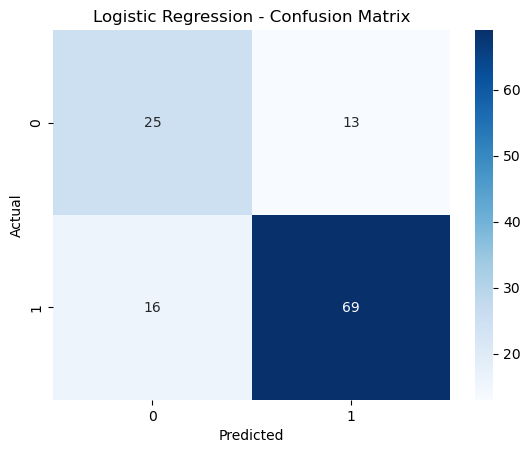


===== Random Forest =====
Best params: {'clf__max_depth': 5, 'clf__n_estimators': 200}
Best CV score: 0.7841
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.50      0.60        38
           1       0.81      0.93      0.86        85

    accuracy                           0.80       123
   macro avg       0.78      0.71      0.73       123
weighted avg       0.79      0.80      0.78       123



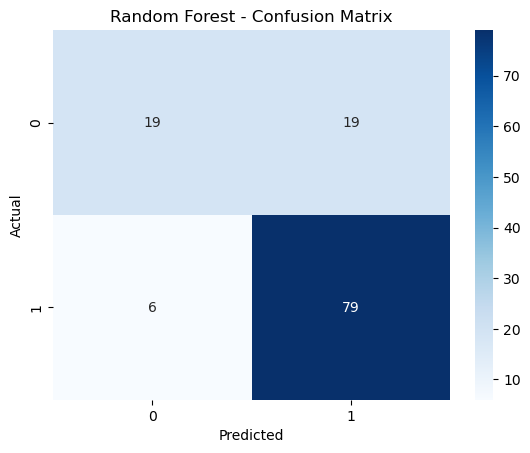


===== SVM =====
Best params: {'clf__C': 0.1, 'clf__gamma': 'scale', 'clf__kernel': 'rbf'}
Best CV score: 0.7657
Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.66      0.64        38
           1       0.84      0.82      0.83        85

    accuracy                           0.77       123
   macro avg       0.73      0.74      0.74       123
weighted avg       0.78      0.77      0.77       123



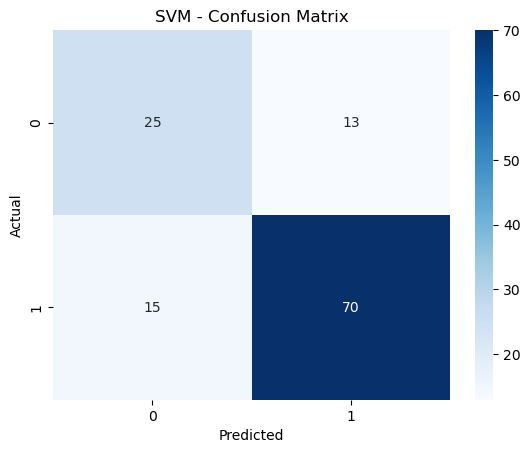


===== KNN =====
Best params: {'clf__metric': 'manhattan', 'clf__n_neighbors': 9, 'clf__weights': 'uniform'}
Best CV score: 0.7617
Classification Report:
               precision    recall  f1-score   support

           0       0.58      0.55      0.57        38
           1       0.80      0.82      0.81        85

    accuracy                           0.74       123
   macro avg       0.69      0.69      0.69       123
weighted avg       0.74      0.74      0.74       123



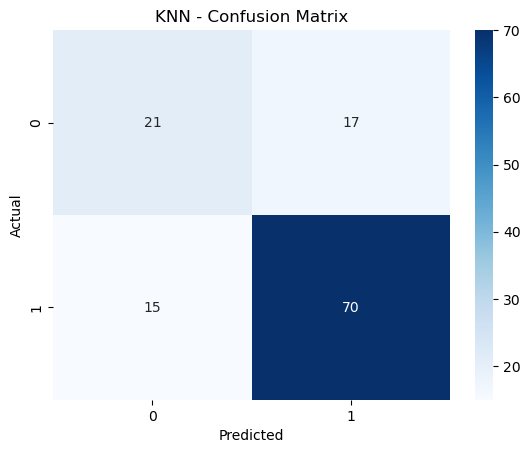

In [139]:
# model training and evaluation
best_models = {}

for name, pipeline in pipelines.items():
    print(f"\n===== {name} =====")
    
    grid = GridSearchCV(pipeline, param_grids[name], cv=5, scoring='accuracy', n_jobs=-1)
    grid.fit(X_train, y_train)
    
    print("Best params:", grid.best_params_)
    print("Best CV score: {:.4f}".format(grid.best_score_))
    
    y_pred = grid.predict(X_test)
    print("Classification Report:\n", classification_report(y_test, y_pred))
    
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"{name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()
    
    # save best model for each algorithm 
    best_models[name] = grid.best_estimator_

## 2.3 feature importance

In [141]:
best_rf = best_models['Random Forest']

In [142]:
importances = best_rf.named_steps['clf'].feature_importances_
feature_names = X_train.columns

feat_imp_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

In [143]:
feat_imp_df

,Feature,Importance
9,Credit_History,0.487188
10,Property_Area,0.102706
7,LoanAmount,0.070848
2,Dependents,0.065288
5,ApplicantIncome,0.063511
6,CoapplicantIncome,0.053212
1,Married,0.051036
8,Loan_Amount_Term,0.042274
3,Education,0.026572
0,Gender,0.024678


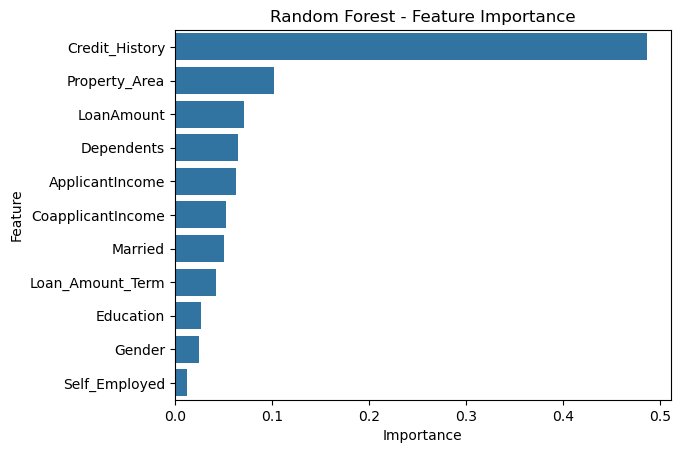

In [144]:
sns.barplot(x='Importance', y='Feature', data=feat_imp_df)
plt.title("Random Forest - Feature Importance")
plt.show()